
# Project: Finding trends in the TMDb Dataset with respect to popularity and revenue collected

## Table of Contents
<ul>
<li><a href="#desc">DATASET DESCRIPTION</a></li>
<li><a href="#ques">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">DATA CLEANING</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='desc'></a>
## DATASET DESCRIPTION

# -Dataset: TMDb DATASET
           This dataset contains infomation about 10,000 Movies collected from TMDb
# -Features:
    1.id: 
    Entry id.
    2.imdb_id: 
    The movie's imdb id.
    3.popularity:
    Popularity of the movie determined by user interactions.
    4.budget:
    The budget of the movie.
    5.revenue:
    Revenue collected.
    6.original_title: 
    Title of the movie at the time of entry.
    7.cast: 
    The cast,a list of actresses and actors seperated by |
    8.homepage:
    Contains the official webpage of the movie in question.
    9.director: 
    The name of the director of the movie.
    10.tagline: 
    The tagline of the movie.
    11.keywords:
    Keywords used by the movie.
    12.overview: 
    The overview of the movie.
    13.runtime:
    Duration in minutes.
    14.genres:
    A list of genres asssociated with the movie seperated by |
    15.production_companies:
    The prodution companies involved with the movie.
    16.release_date:
    The releaxe date of the movie.
    17.vote_count:
    The number of users voted.
    18.vote_average: 
    The rating calculated by means of weigted average.
    19.release_year:
    The year of release.
    20.budget_adj: 
    The budget of the movie in terms of 2010 dollars accounting for inflation over time.
    21.revenue_adj: 
        The revenue of the movie in terms of 2010 dollars accounting for inflation over time


<a id='ques'></a>
## QUESTIONS:
 
    1.Which movie had the highest and least revenue?
    2.Which movie has the highest and least ratings?
    3.Which movie has the highest and least popularity?
    4.Which movie had the highest and least budget?
    5.Which actors have been associated with the movies that earned the most revenue?
    6.Which genres have been associated with the movies that earned the most revenue?
    7.which production companies have been associated with the movies that earned the most revenue?
    8.Which production companies invest the highest in their budgets?


In [50]:
#import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
    Exploring the dataset

In [51]:
#Reading the csv file
df=pd.read_csv('tmdb-movies.csv')


In [52]:
#Taking a look at the original dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [53]:
#Number of entries
df.shape

(10866, 21)

    There are a total of 10866 data points along with 21 columns

In [54]:
#Checking the dataset for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

    The columns that have missing values are the following: imdb_id,cast,homepage,director,tagline,keywords,overview,genres,production_companies.

In [55]:
#Checking the dataset for duplicates
df.duplicated().sum()

1

    There appears to be one duplicated row in the dataset

In [56]:
#Statistical Description of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


    - From these statistics we can see that there are rows where the budget and revenue are zero. This will not be useful  for our analysis so we will remove these rows in the cleaning phase.
    -We will also remove the rows that we do not need for our analysis: imdb_id,overview,runtime,release_date,tagline,director,vote_count,budget and revenue.
    -Since we have the budget_adj and the revenue_adj to account for the respective in 2010 dollars we can remove the budget and the revenue columns.
    

<a id='cleaning'></a>
## DATA CLEANING

In [57]:
#Deleting the duplicate rows
df.drop_duplicates(inplace=True)

In [58]:
#Checking for duplicates again
df.duplicated().sum()

0

In [59]:
#1.Dropping the unneccessary columns
df.drop(['id','imdb_id','budget','revenue','overview','homepage','director','tagline','keywords','release_date','runtime','vote_count'], axis=1, inplace=True)

In [60]:
#Checking the structure of the data again
df.head()

,popularity,original_title,cast,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09


In [61]:
#Dropping the rows that have null values in the genres
df.dropna(axis=0,subset=['genres'],inplace=True)

In [62]:
#Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 9 columns):
popularity              10842 non-null float64
original_title          10842 non-null object
cast                    10767 non-null object
genres                  10842 non-null object
production_companies    9826 non-null object
vote_average            10842 non-null float64
release_year            10842 non-null int64
budget_adj              10842 non-null float64
revenue_adj             10842 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 847.0+ KB


In [63]:
#Dropping null values in production companies
df.dropna(axis=0,subset=['production_companies'],inplace=True)

In [64]:
#Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9826 entries, 0 to 10865
Data columns (total 9 columns):
popularity              9826 non-null float64
original_title          9826 non-null object
cast                    9791 non-null object
genres                  9826 non-null object
production_companies    9826 non-null object
vote_average            9826 non-null float64
release_year            9826 non-null int64
budget_adj              9826 non-null float64
revenue_adj             9826 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 767.7+ KB


In [65]:
#Dropping the null values in the cast
df.dropna(axis=0,subset=['cast'],inplace=True)

In [66]:
#Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9791 entries, 0 to 10865
Data columns (total 9 columns):
popularity              9791 non-null float64
original_title          9791 non-null object
cast                    9791 non-null object
genres                  9791 non-null object
production_companies    9791 non-null object
vote_average            9791 non-null float64
release_year            9791 non-null int64
budget_adj              9791 non-null float64
revenue_adj             9791 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 764.9+ KB


In [67]:
#Converting the genres to string from object
df['genres'].astype(str)

0              Action|Adventure|Science Fiction|Thriller
1              Action|Adventure|Science Fiction|Thriller
2                     Adventure|Science Fiction|Thriller
3               Action|Adventure|Science Fiction|Fantasy
4                                  Action|Crime|Thriller
5                       Western|Drama|Adventure|Thriller
6              Science Fiction|Action|Thriller|Adventure
7                        Drama|Adventure|Science Fiction
8                      Family|Animation|Adventure|Comedy
9                                Comedy|Animation|Family
10                                Action|Adventure|Crime
11              Science Fiction|Fantasy|Action|Adventure
12                                 Drama|Science Fiction
13                         Action|Comedy|Science Fiction
14                      Action|Adventure|Science Fiction
15                           Crime|Drama|Mystery|Western
16                                 Crime|Action|Thriller
17                      Science

In [68]:
#converting production companies to String
df['production_companies'].astype(str)

0        Universal Studios|Amblin Entertainment|Legenda...
1        Village Roadshow Pictures|Kennedy Miller Produ...
2        Summit Entertainment|Mandeville Films|Red Wago...
3                Lucasfilm|Truenorth Productions|Bad Robot
4        Universal Pictures|Original Film|Media Rights ...
5        Regency Enterprises|Appian Way|CatchPlay|Anony...
6                  Paramount Pictures|Skydance Productions
7        Twentieth Century Fox Film Corporation|Scott F...
8            Universal Pictures|Illumination Entertainment
9        Walt Disney Pictures|Pixar Animation Studios|W...
10                            Columbia Pictures|Danjaq|B24
11       Village Roadshow Pictures|Dune Entertainment|A...
12       DNA Films|Universal Pictures International (UP...
13             Columbia Pictures|Happy Madison Productions
14       Marvel Studios|Prime Focus|Revolution Sun Studios
15       Double Feature Films|The Weinstein Company|Fil...
16       Twentieth Century Fox Film Corporation|M6 Film.

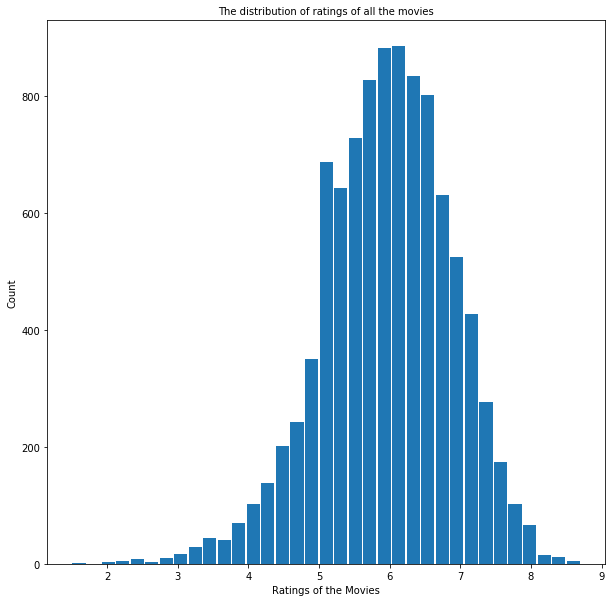

In [98]:
#Plotting the ratings to see its distribution

plt.figure(figsize=(10,10))
plt.xlabel('Ratings of the Movies', fontsize = 10)
#On y-axis 
plt.ylabel('Count', fontsize=10)
#Name of the graph
plt.title('The distribution of ratings of all the movies', fontsize=10)
plt.hist(df['vote_average'], rwidth = 0.9, bins =35)
plt.show()


    The distribution appears to be skewed towards the left.
    From this we may conclude that most of the movies are rated between 5 to 7. Almost 800 movies fall into this category.

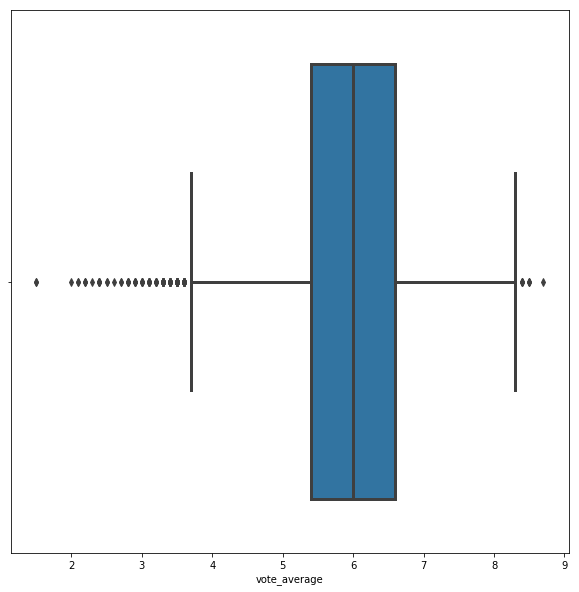

In [70]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.boxplot(df['vote_average'], linewidth = 3)
plt.show()


    From the boxplot we can see that there are a few outliers in the data.

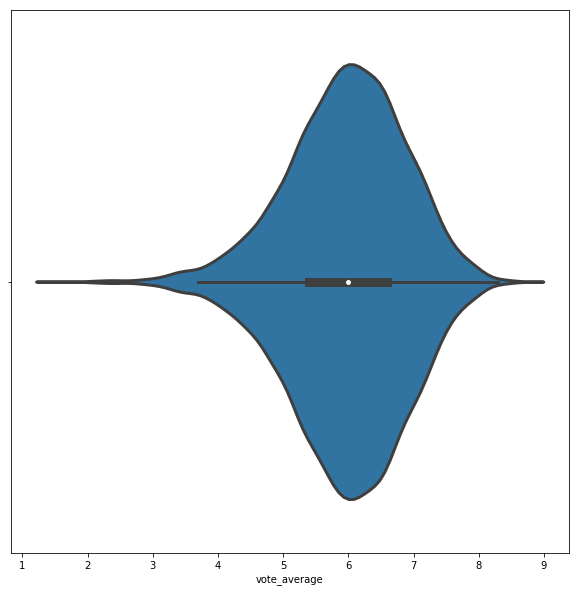

In [71]:
plt.figure(figsize=(10,10))
sns.violinplot(df['vote_average'], linewidth = 3)
plt.show()

In [72]:
#Since genres,production comapnies and cast have multiple entries
df_copy=df 

In [73]:
#splitting the multiple entries 
split_columns = ['genres','production_companies','cast']


for c in split_columns:
    df_copy[c] = df_copy[c].apply(lambda x: x.split("|")[0])
    

In [74]:
df=df_copy
df.head()


,popularity,original_title,cast,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt,Action,Universal Studios,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy,Action,Village Roadshow Pictures,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley,Adventure,Summit Entertainment,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford,Action,Lucasfilm,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel,Action,Universal Pictures,7.3,2015,1.747999e+08,1.385749e+09


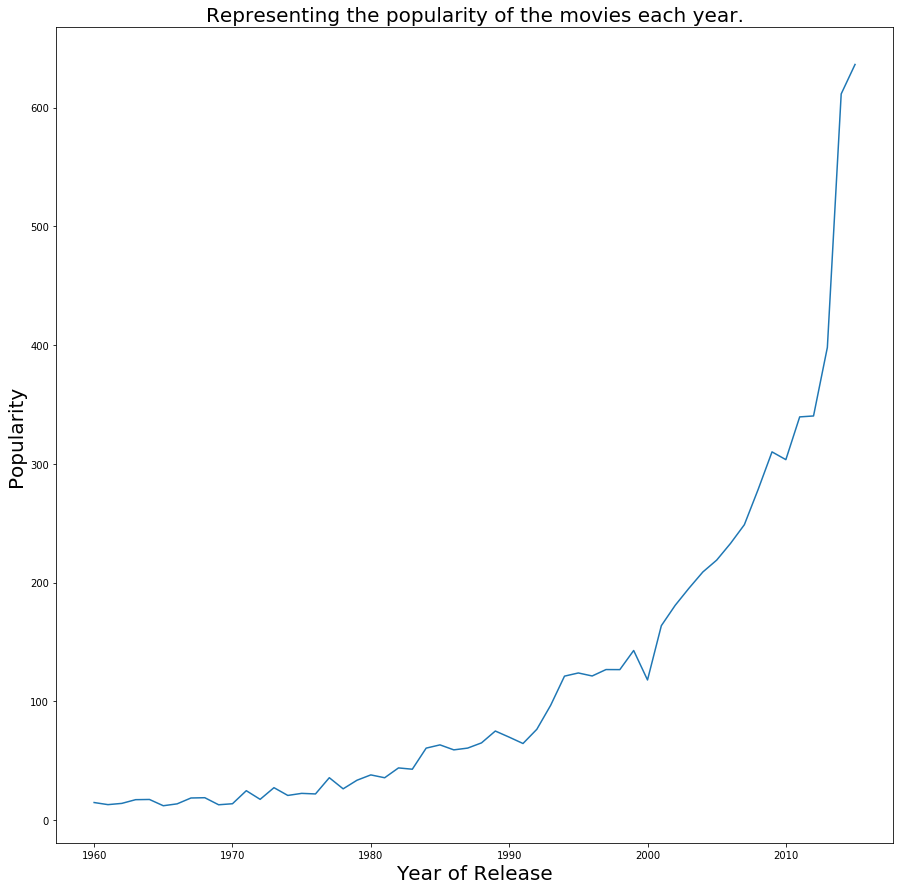

In [100]:
act_rat = df.groupby('release_year')['popularity'].sum()
plt.figure(figsize=(15,15))
plt.xlabel('Year of Release', fontsize = 20)
plt.ylabel('Popularity', fontsize = 20)
plt.title('Representing the popularity of the movies each year.',fontsize=20)
plt.plot(act_rat)
plt.show()

    Seems the popularity of the movies kept increasing by the year. This may be due to the increase in means of advertisements which is made possible by the advancement in communication media.

<a id='eda'></a>
## Exploratory Data Analysis





In [76]:
#Defining a function to calculate details of independant and the dependant variable
def details(column_name):
    
    highest= df[column_name].idxmax()
    print('The movie with the highest {} is {}'.format(column_name,df['original_title'].loc[highest]))
    
    least= df[column_name].idxmin()
    print('The movie with the least {} is {}'.format(column_name,df['original_title'].loc[least]))
    


    Question 1: Which movies have the highest and the least revenue?

In [77]:
#Exploring the revenue
details('revenue_adj')

The movie with the highest revenue_adj is Avatar
The movie with the least revenue_adj is Wild Card


    Question 2: Which movies have the highest and the least ratings?

In [78]:
#Exploring the ratings
details('vote_average')

The movie with the highest vote_average is Pink Floyd: Pulse
The movie with the least vote_average is Transmorphers


    Question 4: Which movies have the highest and the least budget?

In [79]:
#Exploring the budget
details('budget_adj')

The movie with the highest budget_adj is The Warrior's Way
The movie with the least budget_adj is Mr. Holmes


    Question 5: Which movies have the highest and the least popularity

In [80]:
#Exploring the popularity
details('popularity')

The movie with the highest popularity is Jurassic World
The movie with the least popularity is The Hospital


In [81]:
#Exploring the properties of the movies that generated a high revenue
#We will thus consider the movies that have generated a revenue greater than the mean
threshold=df['revenue_adj'].mean()

In [82]:
new_df=df[df['revenue_adj']>=threshold]

In [83]:
new_df.head()

,popularity,original_title,cast,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt,Action,Universal Studios,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy,Action,Village Roadshow Pictures,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley,Adventure,Summit Entertainment,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford,Action,Lucasfilm,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel,Action,Universal Pictures,7.3,2015,1.747999e+08,1.385749e+09


In [84]:
new_df.shape

(2165, 9)

In [85]:
#function to check the properties of the movies with the highest revenue
def properties(column_name):
    properties_list=new_df[column_name].value_counts()
    print("The {} associated with the movies of maximum revenue is {} with a count of {}".format(column_name,properties_list.idxmax(),properties_list.max()))
    print("The others are:")
    print(properties_list.head())


        Question 5: Which genres are associated with movies that generate a high income?

In [86]:
#genre associated with maximum revenue
properties('genres')

The genres associated with the movies of maximum revenue is Comedy with a count of 438
The others are:
Comedy       438
Action       427
Drama        394
Adventure    243
Horror       124
Name: genres, dtype: int64


    Question 6: Which production companies are associated with movies that generate a high income

In [87]:
#production companies associated with maximum revenue
properties('production_companies')

The production_companies associated with the movies of maximum revenue is Universal Pictures with a count of 216
The others are:
Universal Pictures                        216
Paramount Pictures                        209
Columbia Pictures                         145
Twentieth Century Fox Film Corporation    137
Walt Disney Pictures                      102
Name: production_companies, dtype: int64


    Question 8: Which cast are associated with movies that generate a high income

In [88]:
#cast associated with maximum revenue
properties('cast')

The cast associated with the movies of maximum revenue is Tom Hanks with a count of 28
The others are:
Tom Hanks             28
Bruce Willis          25
Tom Cruise            25
Sylvester Stallone    23
Denzel Washington     23
Name: cast, dtype: int64


    Question 8: Which production comapnies are investing most on their budget? 

In [89]:
#Which production companies are associated with investing most on their budget
#Select the mean of the budget from new_df
budget_mean=new_df['budget_adj'].mean()

In [90]:
#Create a new database with the budget greater than the mean
new_df_1=new_df[new_df['budget_adj']>budget_mean]

In [91]:
#finding the production companies associated with more budget
def properties1(column_name):
    properties_list=pd.Series(new_df_1[column_name].value_counts())
    print("The {} associated with the movies of a high budget is {} with a count of {}".format(column_name,properties_list.idxmax(),properties_list.max()))
    print("The others are:")
    print(properties_list.head())
    return properties_list.head(7)
properties1('production_companies')

The production_companies associated with the movies of a high budget is Paramount Pictures with a count of 94
The others are:
Paramount Pictures                        94
Universal Pictures                        84
Columbia Pictures                         72
Walt Disney Pictures                      62
Twentieth Century Fox Film Corporation    49
Name: production_companies, dtype: int64


Paramount Pictures                        94
Universal Pictures                        84
Columbia Pictures                         72
Walt Disney Pictures                      62
Twentieth Century Fox Film Corporation    49
Village Roadshow Pictures                 35
DreamWorks SKG                            32
Name: production_companies, dtype: int64

In [92]:
#Defining a function to convert result to series to help with plotting
def communication(column_name):
    properties_list=pd.Series(new_df[column_name].value_counts())
    return properties_list.head()


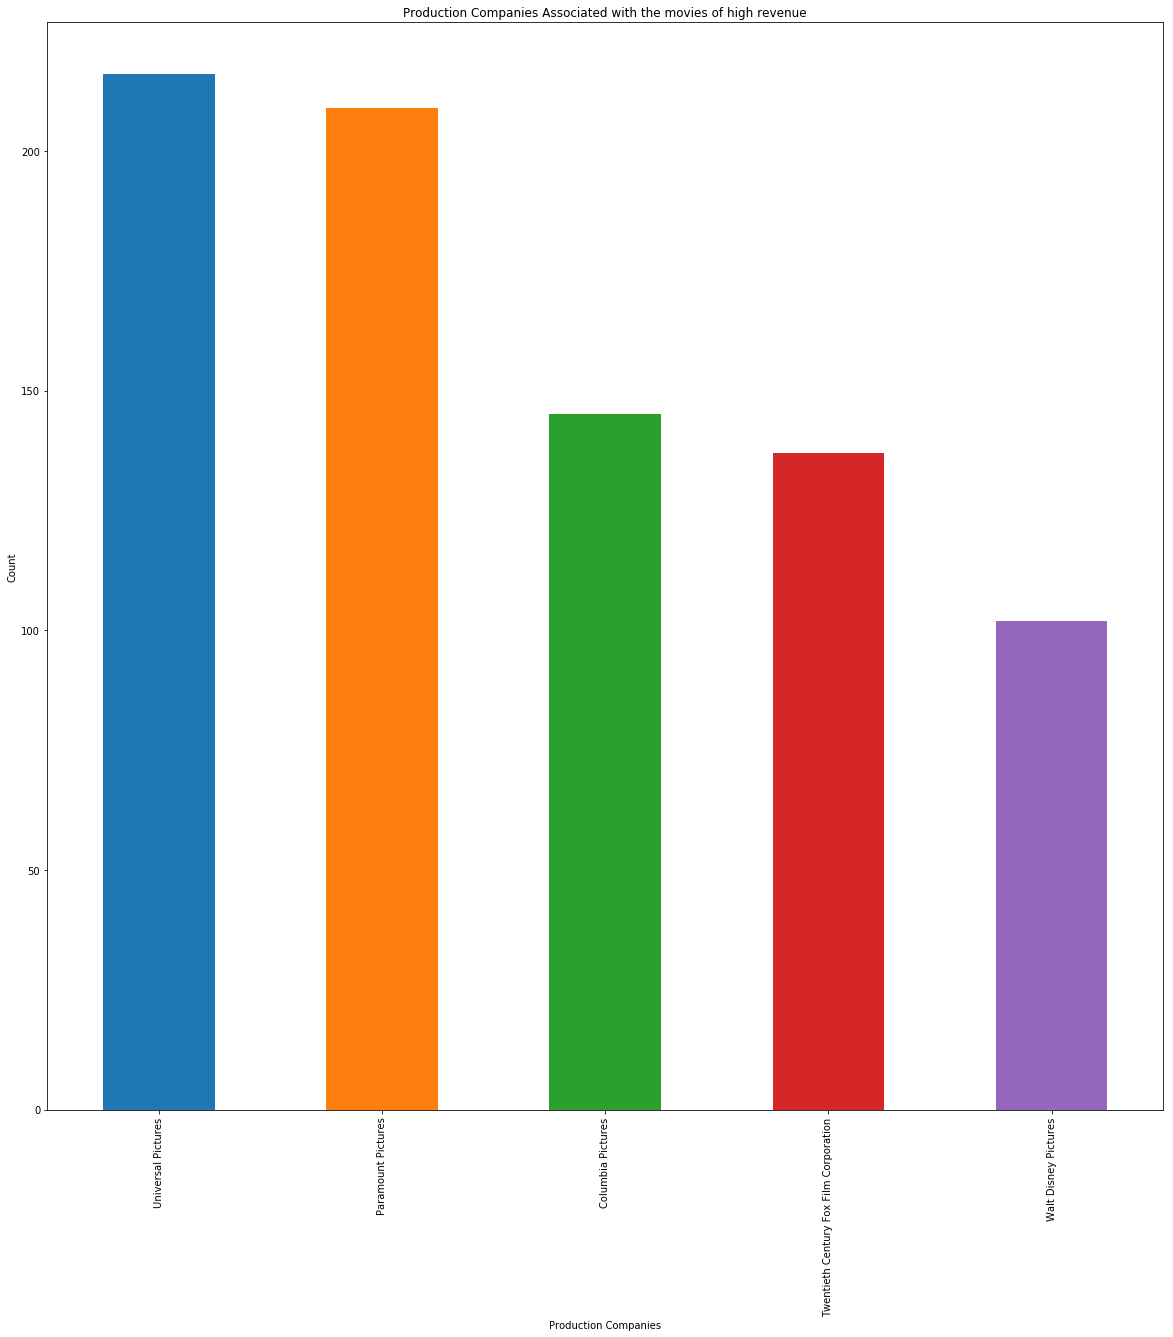

In [93]:
#The production companies associated with high revenue
companies=communication('production_companies')
figure1=companies.plot(kind='bar',title='Production Companies Associated with the movies of high revenue');
figure1.set_xlabel('Production Companies')
figure1.set_ylabel('Count')
figure1.figure.set_size_inches(20,20)

    From this plot we can see that these production comapnies have produced movies with a high revenue.

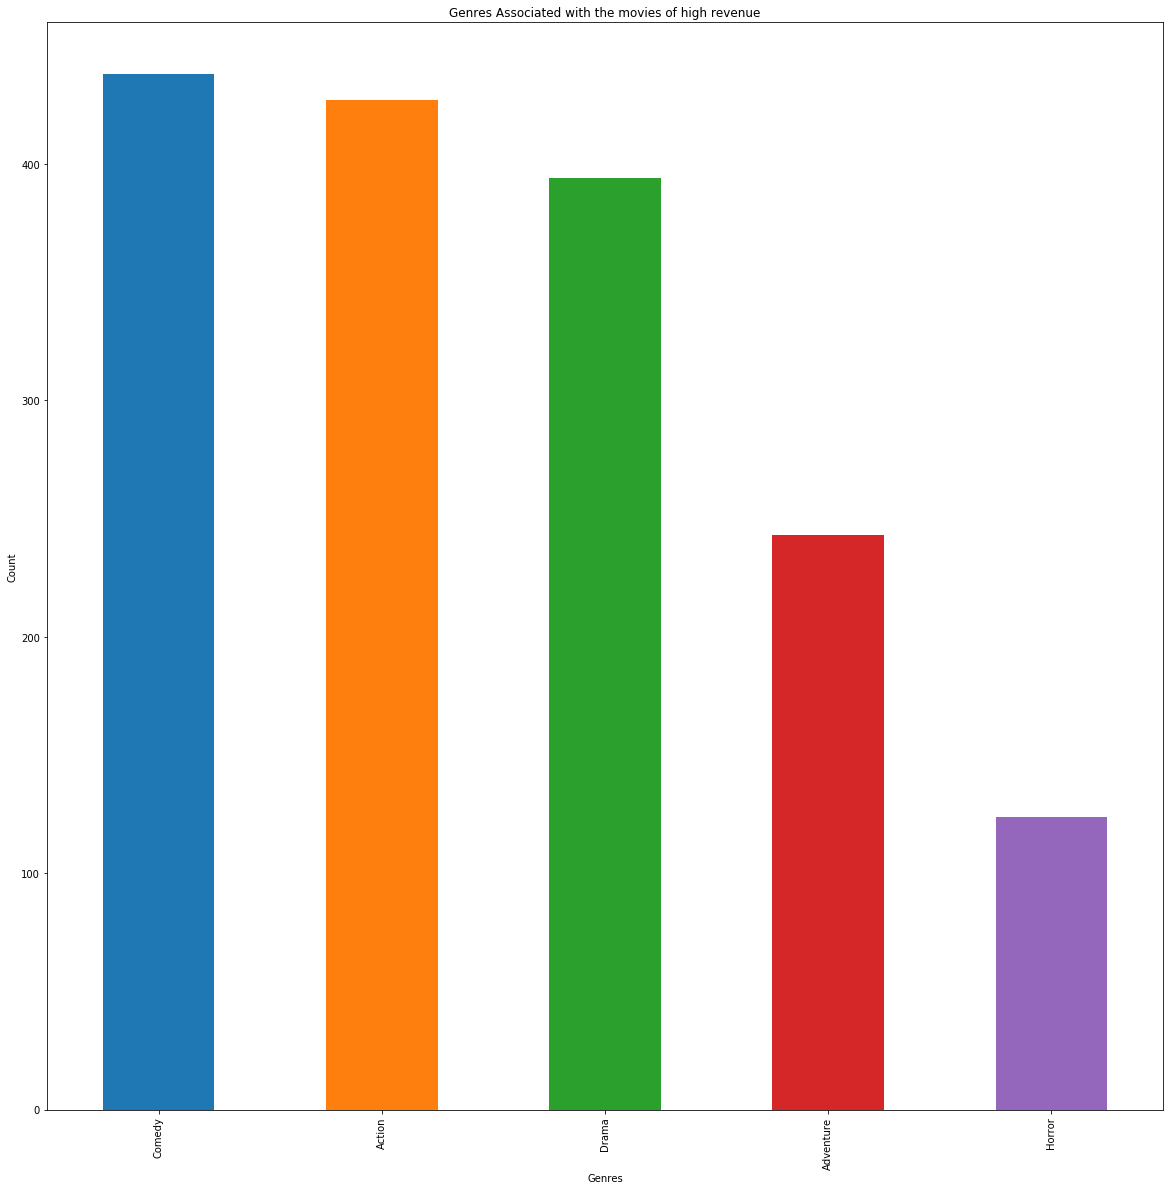

In [94]:
#Communicating the Findings
#The genres associated with the high revenue films
genres=communication('genres')
figure2=genres.plot(kind='bar',title='Genres Associated with the movies of high revenue');
figure2.set_xlabel('Genres')
figure2.set_ylabel('Count')
figure2.figure.set_size_inches(20,20)

    From this plot we can see that these five genres have collected most revenue when employed in movies.

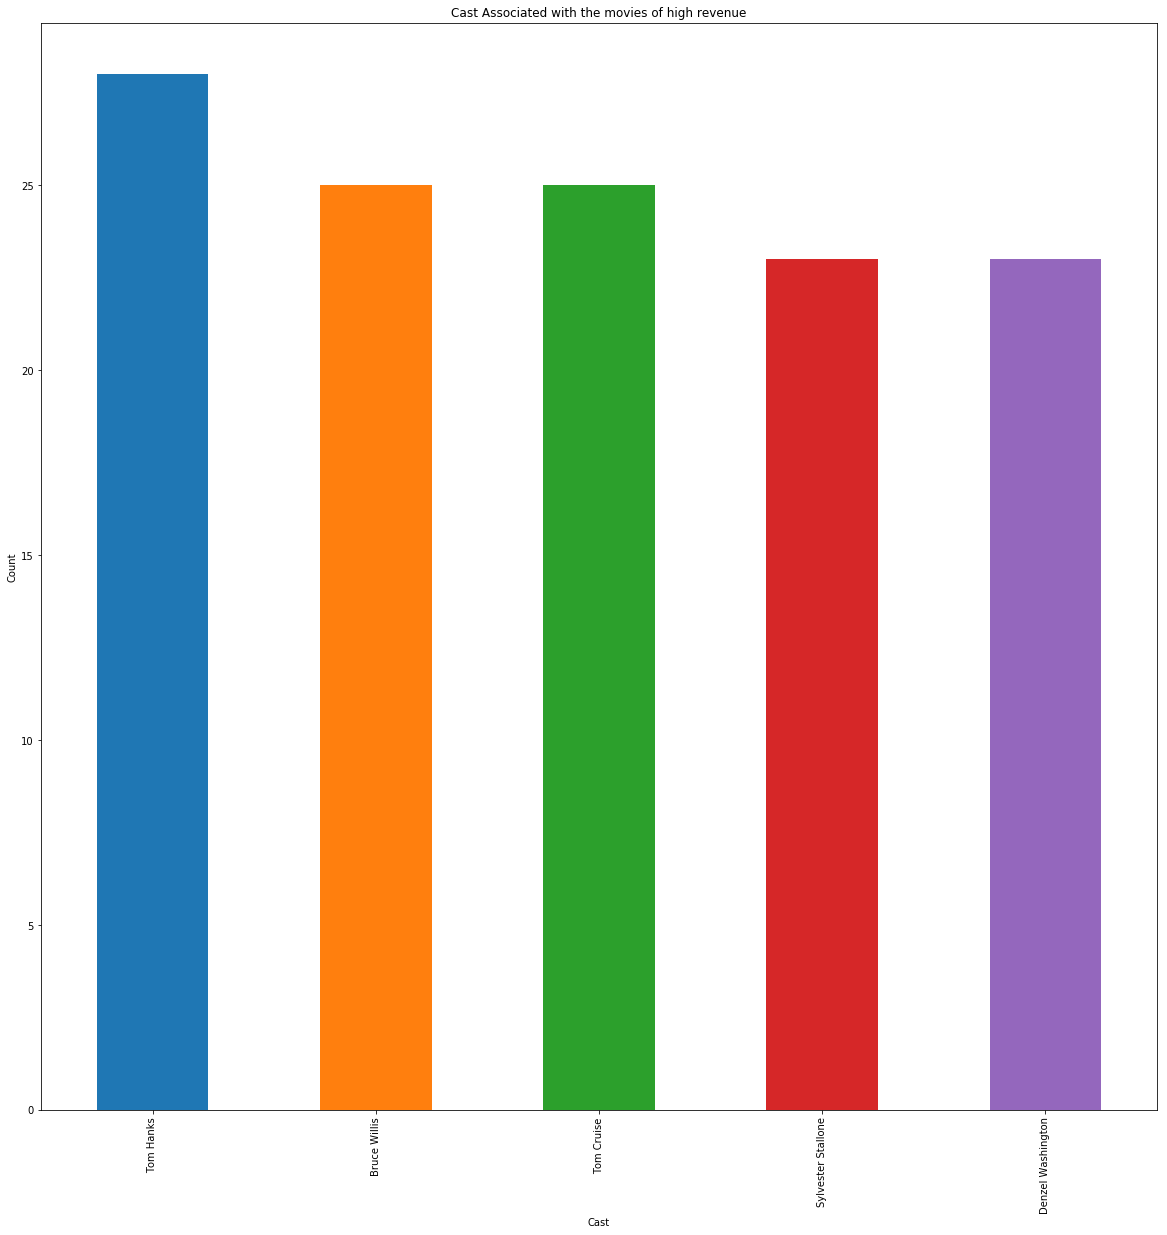

In [95]:
#The cast associated with the movies generating maximum revenue
cast=communication('cast')
figure3=cast.plot(kind='bar',title='Cast Associated with the movies of high revenue');
figure3.set_xlabel('Cast')
figure3.set_ylabel('Count')
figure3.figure.set_size_inches(20,20)

    From this plot we can notice that these actors have frequently appeared in movies that generated a high revenue.

The production_companies associated with the movies of a high budget is Paramount Pictures with a count of 94
The others are:
Paramount Pictures                        94
Universal Pictures                        84
Columbia Pictures                         72
Walt Disney Pictures                      62
Twentieth Century Fox Film Corporation    49
Name: production_companies, dtype: int64


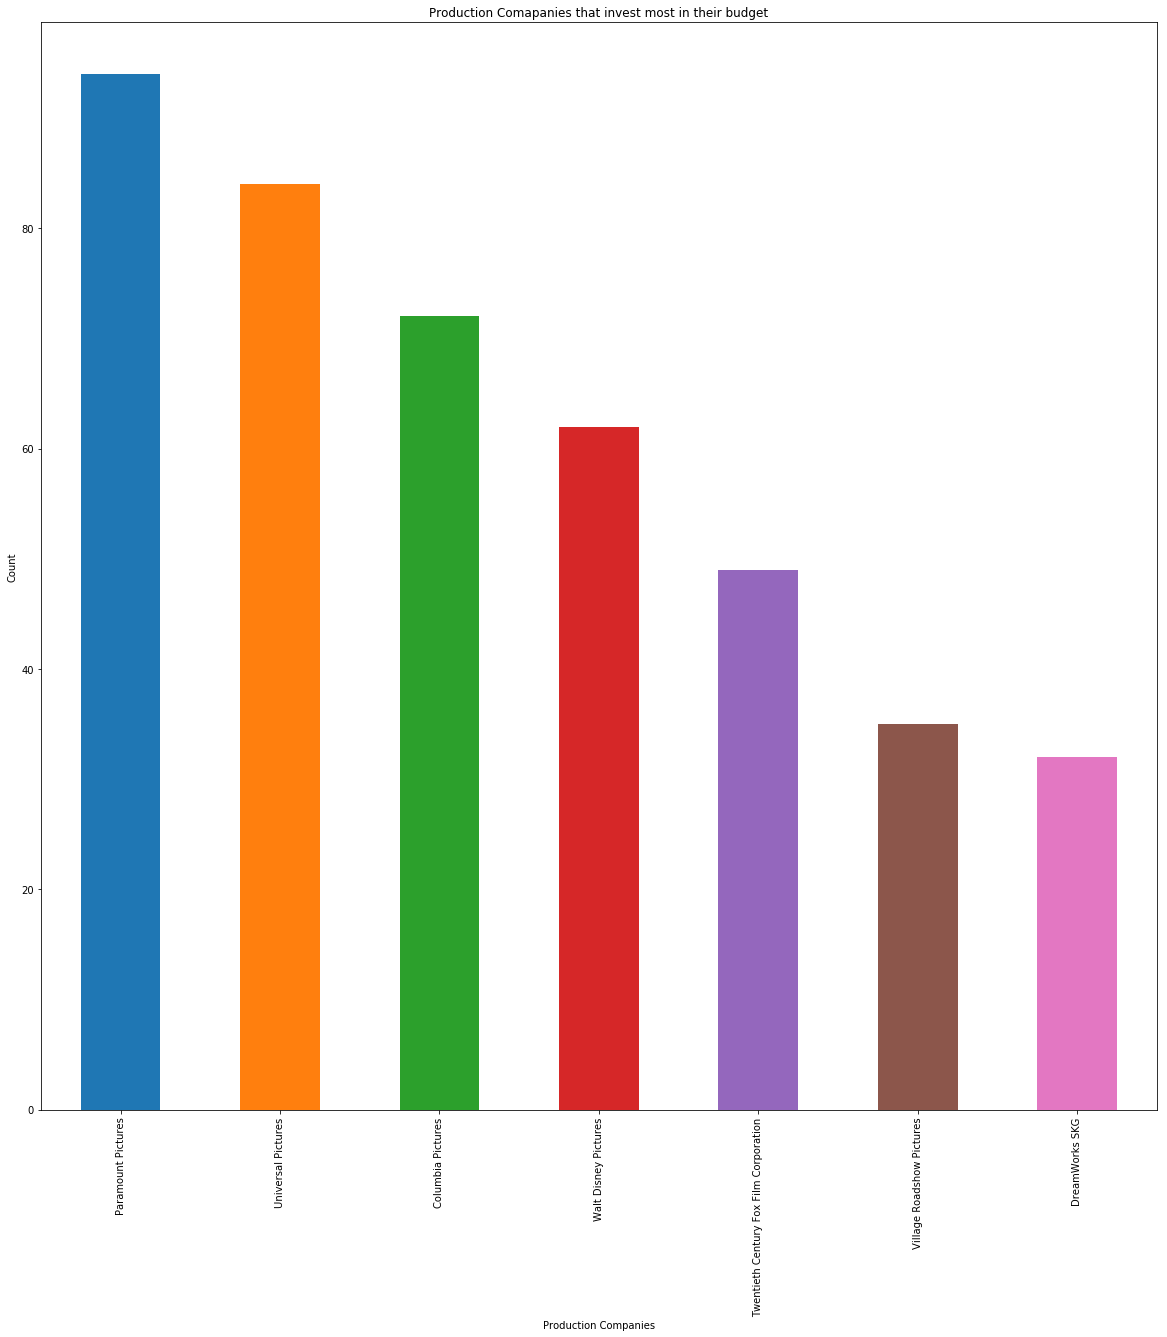

In [96]:
#production companies associated with maximum budget
prod_budget=properties1('production_companies')
figure3=prod_budget.plot(kind='bar',title='Production Comapanies that invest most in their budget');
figure3.set_xlabel('Production Companies')
figure3.set_ylabel('Count')
figure3.figure.set_size_inches(20,20)


    From this plot it can be seen that these production companies invest most in their budgets.

<a id='conclusions'></a>
## Conclusions
    #LIMITATIONS
       -A lot of data points had to be removed because of null values in several columns that were key to the analysis.
       Since the columns that were key to the analysis had a lot null values in their data points they had to be deleted which resulted in the decrease of the total number of data points.
       -The analysis has been done only on the movies that generated a revenue greater than the average revenue generated.
       Taking the average as the threshold for the analysis may not be the most optimal but since no threshold was given this seemed to be the most reasonable base.
       

    #CONCLUSIONS
    -Comedy seems to be a profitable genre as it has collected the most revenue in this dataset.
    -Actors like Tom Hanks and Bruce willis seem to be in movies that generate a lot of income.
    -Universal studios and Paramount pictures seem to generate a lot of income.
    -Paramount pictures seem to be investing a lot of money in their budgets.

In [97]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0